# Demo Manipulation

## Export Data

Feature extraction and matching work directly from images, so export these first.

In [1]:
%load_ext autoreload
%autoreload 2
from tqdm.notebook import tqdm  # notebook-friendly progress bars
from pathlib import Path

from hloc import extract_features, match_features, reconstruction, visualization, pairs_from_exhaustive
from hloc.visualization import plot_images, read_image, plot_keypoints
from hloc.utils import viz_3d

In [2]:
from flow_control.demo.playback_env_servo import PlaybackEnvServo
from flow_control.localize.hloc_utils import export_images_by_parts

# root_dir = Path("/home/argusm/CLUSTER/robot_recordings/flow/recombination/2023-01-24")
root_dir = Path("/home/argusm/Desktop/Demonstrations/2023-01-24")
# root_dir = Path("/home/nayakab/Desktop/Courses/WS2022/Project/cluster/")
parts_fn = root_dir / 'parts.json'
hloc_root = root_dir.parent / ( str(root_dir.name) + '_hloc')

mapping_dir = hloc_root / 'mapping'
outputs = hloc_root / 'outputs'
sfm_pairs = outputs / 'pairs-sfm.txt'
loc_pairs = outputs / 'pairs-loc.txt'
sfm_dir = outputs / 'sfm'
features_path = outputs / 'features.h5'
matches_path = outputs / 'matches.h5'
!rm -rf $outputs
!rm -rf $mapping_dir

parts_references = export_images_by_parts(root_dir, parts_fn, mapping_dir)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


100%|███████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:25<00:00,  3.48it/s]


In [3]:
references_all = [ref for ref_part in parts_references.values() for ref in ref_part]
references_files = [p.relative_to(hloc_root).as_posix() for p in (hloc_root / 'mapping/').iterdir()]
assert len(set(references_all)-set(references_files)) == 0
references = parts_references['locate']

30 mapping images


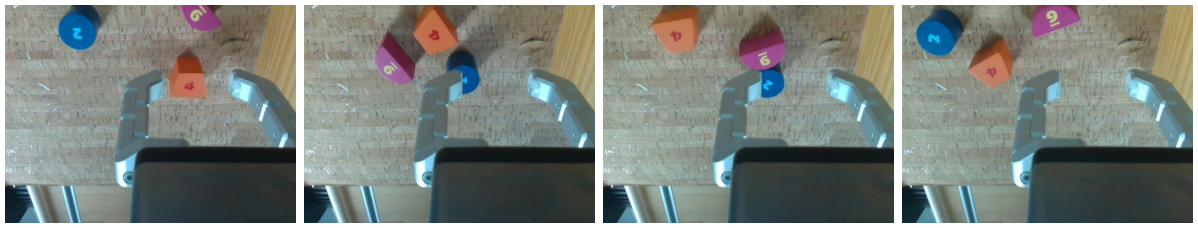

In [4]:
print(len(references), "mapping images")
plot_images([read_image(hloc_root / r) for r in references[:4]], dpi=50)

In [5]:
from flow_control.localize.hloc_utils import save_features_seg

features_seg_path = outputs / 'features_seg.h5'

feature_conf = extract_features.confs['superpoint_aachen']
matcher_conf = match_features.confs['superglue']

extract_features.main(feature_conf, hloc_root, image_list=references_all, feature_path=features_path)
save_features_seg(root_dir, features_seg_path, features_path, references_all)

pairs_from_exhaustive.main(sfm_pairs, image_list=references)
match_features.main(matcher_conf, sfm_pairs, features=features_path, matches=matches_path)

[2023/04/04 13:48:28 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 4096, 'name': 'superpoint', 'nms_radius': 3},
 'output': 'feats-superpoint-n4096-r1024',
 'preprocessing': {'grayscale': True, 'resize_max': 1024}}


Loaded SuperPoint model


100%|███████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:02<00:00, 42.35it/s]
[2023/04/04 13:48:31 hloc INFO] Finished exporting features.
  0%|                                                                                                    | 0/90 [00:00<?, ?it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-18-38
/home/argusm/Desktop/Demonstrations/2023-01-24/14-18-38/frame_000018.npz


  1%|█                                                                                           | 1/90 [00:00<00:22,  3.90it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-36-55
/home/argusm/Desktop/Demonstrations/2023-01-24/14-36-55/frame_000018.npz


  2%|██                                                                                          | 2/90 [00:00<00:21,  4.05it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-39-05
/home/argusm/Desktop/Demonstrations/2023-01-24/14-39-05/frame_000018.npz


  3%|███                                                                                         | 3/90 [00:00<00:21,  4.04it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-41-43
/home/argusm/Desktop/Demonstrations/2023-01-24/14-41-43/frame_000018.npz


  4%|████                                                                                        | 4/90 [00:01<00:23,  3.73it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-44-07
/home/argusm/Desktop/Demonstrations/2023-01-24/14-44-07/frame_000018.npz


  6%|█████                                                                                       | 5/90 [00:01<00:23,  3.60it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-46-44
/home/argusm/Desktop/Demonstrations/2023-01-24/14-46-44/frame_000018.npz


  7%|██████▏                                                                                     | 6/90 [00:01<00:25,  3.35it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-49-29
/home/argusm/Desktop/Demonstrations/2023-01-24/14-49-29/frame_000018.npz


  8%|███████▏                                                                                    | 7/90 [00:01<00:24,  3.39it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-52-16
/home/argusm/Desktop/Demonstrations/2023-01-24/14-52-16/frame_000018.npz


  9%|████████▏                                                                                   | 8/90 [00:02<00:22,  3.60it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-54-22
/home/argusm/Desktop/Demonstrations/2023-01-24/14-54-22/frame_000018.npz


 10%|█████████▏                                                                                  | 9/90 [00:02<00:24,  3.31it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-58-14
/home/argusm/Desktop/Demonstrations/2023-01-24/14-58-14/frame_000018.npz


 11%|██████████                                                                                 | 10/90 [00:02<00:22,  3.56it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-00-24
/home/argusm/Desktop/Demonstrations/2023-01-24/15-00-24/frame_000018.npz


 12%|███████████                                                                                | 11/90 [00:03<00:22,  3.49it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-04-55
/home/argusm/Desktop/Demonstrations/2023-01-24/15-04-55/frame_000018.npz


 13%|████████████▏                                                                              | 12/90 [00:03<00:21,  3.57it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-07-03
/home/argusm/Desktop/Demonstrations/2023-01-24/15-07-03/frame_000018.npz


 14%|█████████████▏                                                                             | 13/90 [00:03<00:20,  3.68it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-10-40
/home/argusm/Desktop/Demonstrations/2023-01-24/15-10-40/frame_000018.npz


 16%|██████████████▏                                                                            | 14/90 [00:03<00:20,  3.68it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-12-57
/home/argusm/Desktop/Demonstrations/2023-01-24/15-12-57/frame_000018.npz


 17%|███████████████▏                                                                           | 15/90 [00:04<00:19,  3.83it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-14-32
/home/argusm/Desktop/Demonstrations/2023-01-24/15-14-32/frame_000018.npz


 18%|████████████████▏                                                                          | 16/90 [00:04<00:19,  3.80it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-21-36
/home/argusm/Desktop/Demonstrations/2023-01-24/15-21-36/frame_000018.npz


 19%|█████████████████▏                                                                         | 17/90 [00:04<00:17,  4.07it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-24-11
/home/argusm/Desktop/Demonstrations/2023-01-24/15-24-11/frame_000018.npz


 21%|███████████████████▏                                                                       | 19/90 [00:05<00:17,  4.06it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-26-27
/home/argusm/Desktop/Demonstrations/2023-01-24/15-26-27/frame_000018.npz
/home/argusm/Desktop/Demonstrations/2023-01-24 15-28-48
/home/argusm/Desktop/Demonstrations/2023-01-24/15-28-48/frame_000018.npz


 22%|████████████████████▏                                                                      | 20/90 [00:05<00:19,  3.57it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-32-16
/home/argusm/Desktop/Demonstrations/2023-01-24/15-32-16/frame_000018.npz


 23%|█████████████████████▏                                                                     | 21/90 [00:05<00:19,  3.48it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-40-31
/home/argusm/Desktop/Demonstrations/2023-01-24/15-40-31/frame_000018.npz


 24%|██████████████████████▏                                                                    | 22/90 [00:06<00:19,  3.51it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-42-27
/home/argusm/Desktop/Demonstrations/2023-01-24/15-42-27/frame_000018.npz


 26%|███████████████████████▎                                                                   | 23/90 [00:06<00:19,  3.39it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-44-44
/home/argusm/Desktop/Demonstrations/2023-01-24/15-44-44/frame_000018.npz


 27%|████████████████████████▎                                                                  | 24/90 [00:06<00:19,  3.43it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 17-52-21
/home/argusm/Desktop/Demonstrations/2023-01-24/17-52-21/frame_000018.npz


 28%|█████████████████████████▎                                                                 | 25/90 [00:06<00:18,  3.60it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 17-56-13
/home/argusm/Desktop/Demonstrations/2023-01-24/17-56-13/frame_000018.npz


 29%|██████████████████████████▎                                                                | 26/90 [00:07<00:17,  3.73it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 18-00-22
/home/argusm/Desktop/Demonstrations/2023-01-24/18-00-22/frame_000018.npz


 30%|███████████████████████████▎                                                               | 27/90 [00:07<00:16,  3.74it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 18-03-19
/home/argusm/Desktop/Demonstrations/2023-01-24/18-03-19/frame_000018.npz


 31%|████████████████████████████▎                                                              | 28/90 [00:07<00:17,  3.48it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 18-06-19
/home/argusm/Desktop/Demonstrations/2023-01-24/18-06-19/frame_000018.npz


 32%|█████████████████████████████▎                                                             | 29/90 [00:07<00:16,  3.66it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 18-08-23
/home/argusm/Desktop/Demonstrations/2023-01-24/18-08-23/frame_000018.npz


 33%|██████████████████████████████▎                                                            | 30/90 [00:08<00:16,  3.54it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-18-38
/home/argusm/Desktop/Demonstrations/2023-01-24/14-18-38/frame_000185.npz


 34%|███████████████████████████████▎                                                           | 31/90 [00:08<00:16,  3.64it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-36-55
/home/argusm/Desktop/Demonstrations/2023-01-24/14-36-55/frame_000123.npz


 36%|████████████████████████████████▎                                                          | 32/90 [00:08<00:15,  3.78it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-39-05
/home/argusm/Desktop/Demonstrations/2023-01-24/14-39-05/frame_000154.npz


 37%|█████████████████████████████████▎                                                         | 33/90 [00:09<00:14,  3.85it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-41-43
/home/argusm/Desktop/Demonstrations/2023-01-24/14-41-43/frame_000188.npz


 38%|██████████████████████████████████▍                                                        | 34/90 [00:09<00:15,  3.71it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-44-07
/home/argusm/Desktop/Demonstrations/2023-01-24/14-44-07/frame_000154.npz


 39%|███████████████████████████████████▍                                                       | 35/90 [00:09<00:15,  3.62it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-46-44
/home/argusm/Desktop/Demonstrations/2023-01-24/14-46-44/frame_000566.npz


 40%|████████████████████████████████████▍                                                      | 36/90 [00:09<00:15,  3.40it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-49-29
/home/argusm/Desktop/Demonstrations/2023-01-24/14-49-29/frame_000162.npz


 41%|█████████████████████████████████████▍                                                     | 37/90 [00:10<00:15,  3.44it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-52-16
/home/argusm/Desktop/Demonstrations/2023-01-24/14-52-16/frame_000192.npz


 42%|██████████████████████████████████████▍                                                    | 38/90 [00:10<00:14,  3.63it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-54-22
/home/argusm/Desktop/Demonstrations/2023-01-24/14-54-22/frame_000194.npz


 43%|███████████████████████████████████████▍                                                   | 39/90 [00:10<00:15,  3.34it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-58-14
/home/argusm/Desktop/Demonstrations/2023-01-24/14-58-14/frame_000109.npz


 44%|████████████████████████████████████████▍                                                  | 40/90 [00:11<00:13,  3.61it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-00-24
/home/argusm/Desktop/Demonstrations/2023-01-24/15-00-24/frame_000092.npz


 46%|█████████████████████████████████████████▍                                                 | 41/90 [00:11<00:13,  3.55it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-04-55
/home/argusm/Desktop/Demonstrations/2023-01-24/15-04-55/frame_000104.npz


 47%|██████████████████████████████████████████▍                                                | 42/90 [00:11<00:13,  3.59it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-07-03
/home/argusm/Desktop/Demonstrations/2023-01-24/15-07-03/frame_000156.npz


 48%|███████████████████████████████████████████▍                                               | 43/90 [00:11<00:12,  3.70it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-10-40
/home/argusm/Desktop/Demonstrations/2023-01-24/15-10-40/frame_000306.npz


 49%|████████████████████████████████████████████▍                                              | 44/90 [00:12<00:12,  3.70it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-12-57
/home/argusm/Desktop/Demonstrations/2023-01-24/15-12-57/frame_000102.npz


 50%|█████████████████████████████████████████████▌                                             | 45/90 [00:12<00:11,  3.87it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-14-32
/home/argusm/Desktop/Demonstrations/2023-01-24/15-14-32/frame_000117.npz


 51%|██████████████████████████████████████████████▌                                            | 46/90 [00:12<00:11,  3.85it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-21-36
/home/argusm/Desktop/Demonstrations/2023-01-24/15-21-36/frame_000146.npz


 52%|███████████████████████████████████████████████▌                                           | 47/90 [00:12<00:10,  4.09it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-24-11
/home/argusm/Desktop/Demonstrations/2023-01-24/15-24-11/frame_000209.npz


 54%|█████████████████████████████████████████████████▌                                         | 49/90 [00:13<00:10,  4.03it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-26-27
/home/argusm/Desktop/Demonstrations/2023-01-24/15-26-27/frame_000079.npz
/home/argusm/Desktop/Demonstrations/2023-01-24 15-28-48
/home/argusm/Desktop/Demonstrations/2023-01-24/15-28-48/frame_000088.npz


 56%|██████████████████████████████████████████████████▌                                        | 50/90 [00:13<00:11,  3.48it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-32-16
/home/argusm/Desktop/Demonstrations/2023-01-24/15-32-16/frame_000187.npz


 57%|███████████████████████████████████████████████████▌                                       | 51/90 [00:14<00:11,  3.39it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-40-31
/home/argusm/Desktop/Demonstrations/2023-01-24/15-40-31/frame_000096.npz


 58%|████████████████████████████████████████████████████▌                                      | 52/90 [00:14<00:11,  3.43it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-42-27
/home/argusm/Desktop/Demonstrations/2023-01-24/15-42-27/frame_000148.npz


 59%|█████████████████████████████████████████████████████▌                                     | 53/90 [00:14<00:11,  3.33it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-44-44
/home/argusm/Desktop/Demonstrations/2023-01-24/15-44-44/frame_000120.npz


 60%|██████████████████████████████████████████████████████▌                                    | 54/90 [00:14<00:10,  3.36it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 17-52-21
/home/argusm/Desktop/Demonstrations/2023-01-24/17-52-21/frame_000123.npz


 61%|███████████████████████████████████████████████████████▌                                   | 55/90 [00:15<00:10,  3.49it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 17-56-13
/home/argusm/Desktop/Demonstrations/2023-01-24/17-56-13/frame_000162.npz


 62%|████████████████████████████████████████████████████████▌                                  | 56/90 [00:15<00:09,  3.61it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 18-00-22
/home/argusm/Desktop/Demonstrations/2023-01-24/18-00-22/frame_000107.npz


 63%|█████████████████████████████████████████████████████████▋                                 | 57/90 [00:15<00:09,  3.63it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 18-03-19
/home/argusm/Desktop/Demonstrations/2023-01-24/18-03-19/frame_000335.npz


 64%|██████████████████████████████████████████████████████████▋                                | 58/90 [00:16<00:09,  3.41it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 18-06-19
/home/argusm/Desktop/Demonstrations/2023-01-24/18-06-19/frame_000128.npz


 66%|███████████████████████████████████████████████████████████▋                               | 59/90 [00:16<00:08,  3.59it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 18-08-23
/home/argusm/Desktop/Demonstrations/2023-01-24/18-08-23/frame_000176.npz


 67%|████████████████████████████████████████████████████████████▋                              | 60/90 [00:16<00:08,  3.50it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-18-38
/home/argusm/Desktop/Demonstrations/2023-01-24/14-18-38/frame_000386.npz


 68%|█████████████████████████████████████████████████████████████▋                             | 61/90 [00:16<00:07,  3.66it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-36-55
/home/argusm/Desktop/Demonstrations/2023-01-24/14-36-55/frame_000387.npz


 69%|██████████████████████████████████████████████████████████████▋                            | 62/90 [00:17<00:07,  3.80it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-39-05
/home/argusm/Desktop/Demonstrations/2023-01-24/14-39-05/frame_000405.npz


 70%|███████████████████████████████████████████████████████████████▋                           | 63/90 [00:17<00:06,  3.87it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-41-43
/home/argusm/Desktop/Demonstrations/2023-01-24/14-41-43/frame_000472.npz


 71%|████████████████████████████████████████████████████████████████▋                          | 64/90 [00:17<00:07,  3.70it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-44-07
/home/argusm/Desktop/Demonstrations/2023-01-24/14-44-07/frame_000412.npz


 72%|█████████████████████████████████████████████████████████████████▋                         | 65/90 [00:17<00:06,  3.61it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-46-44
/home/argusm/Desktop/Demonstrations/2023-01-24/14-46-44/frame_000737.npz


 73%|██████████████████████████████████████████████████████████████████▋                        | 66/90 [00:18<00:07,  3.39it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-49-29
/home/argusm/Desktop/Demonstrations/2023-01-24/14-49-29/frame_000451.npz


 74%|███████████████████████████████████████████████████████████████████▋                       | 67/90 [00:18<00:06,  3.42it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-52-16
/home/argusm/Desktop/Demonstrations/2023-01-24/14-52-16/frame_000460.npz


 76%|████████████████████████████████████████████████████████████████████▊                      | 68/90 [00:18<00:06,  3.62it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-54-22
/home/argusm/Desktop/Demonstrations/2023-01-24/14-54-22/frame_000658.npz


 77%|█████████████████████████████████████████████████████████████████████▊                     | 69/90 [00:19<00:06,  3.34it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-58-14
/home/argusm/Desktop/Demonstrations/2023-01-24/14-58-14/frame_000392.npz


 78%|██████████████████████████████████████████████████████████████████████▊                    | 70/90 [00:19<00:05,  3.58it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-00-24
/home/argusm/Desktop/Demonstrations/2023-01-24/15-00-24/frame_000334.npz


 79%|███████████████████████████████████████████████████████████████████████▊                   | 71/90 [00:19<00:05,  3.52it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-04-55
/home/argusm/Desktop/Demonstrations/2023-01-24/15-04-55/frame_000418.npz


 80%|████████████████████████████████████████████████████████████████████████▊                  | 72/90 [00:19<00:05,  3.55it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-07-03
/home/argusm/Desktop/Demonstrations/2023-01-24/15-07-03/frame_000348.npz


 81%|█████████████████████████████████████████████████████████████████████████▊                 | 73/90 [00:20<00:04,  3.67it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-10-40
/home/argusm/Desktop/Demonstrations/2023-01-24/15-10-40/frame_000559.npz


 82%|██████████████████████████████████████████████████████████████████████████▊                | 74/90 [00:20<00:04,  3.67it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-12-57
/home/argusm/Desktop/Demonstrations/2023-01-24/15-12-57/frame_000264.npz


 83%|███████████████████████████████████████████████████████████████████████████▊               | 75/90 [00:20<00:03,  3.88it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-14-32
/home/argusm/Desktop/Demonstrations/2023-01-24/15-14-32/frame_000519.npz


 86%|█████████████████████████████████████████████████████████████████████████████▊             | 77/90 [00:21<00:03,  4.12it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-21-36
/home/argusm/Desktop/Demonstrations/2023-01-24/15-21-36/frame_000323.npz
/home/argusm/Desktop/Demonstrations/2023-01-24 15-24-11
/home/argusm/Desktop/Demonstrations/2023-01-24/15-24-11/frame_000567.npz


 88%|███████████████████████████████████████████████████████████████████████████████▉           | 79/90 [00:21<00:02,  4.08it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-26-27
/home/argusm/Desktop/Demonstrations/2023-01-24/15-26-27/frame_000216.npz
/home/argusm/Desktop/Demonstrations/2023-01-24 15-28-48
/home/argusm/Desktop/Demonstrations/2023-01-24/15-28-48/frame_000625.npz


 89%|████████████████████████████████████████████████████████████████████████████████▉          | 80/90 [00:22<00:02,  3.52it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-32-16
/home/argusm/Desktop/Demonstrations/2023-01-24/15-32-16/frame_000486.npz


 90%|█████████████████████████████████████████████████████████████████████████████████▉         | 81/90 [00:22<00:02,  3.46it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-40-31
/home/argusm/Desktop/Demonstrations/2023-01-24/15-40-31/frame_000375.npz


 91%|██████████████████████████████████████████████████████████████████████████████████▉        | 82/90 [00:22<00:02,  3.50it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-42-27
/home/argusm/Desktop/Demonstrations/2023-01-24/15-42-27/frame_000403.npz


 92%|███████████████████████████████████████████████████████████████████████████████████▉       | 83/90 [00:22<00:02,  3.40it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 15-44-44
/home/argusm/Desktop/Demonstrations/2023-01-24/15-44-44/frame_000467.npz


 93%|████████████████████████████████████████████████████████████████████████████████████▉      | 84/90 [00:23<00:01,  3.43it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 17-52-21
/home/argusm/Desktop/Demonstrations/2023-01-24/17-52-21/frame_000420.npz


 94%|█████████████████████████████████████████████████████████████████████████████████████▉     | 85/90 [00:23<00:01,  3.57it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 17-56-13
/home/argusm/Desktop/Demonstrations/2023-01-24/17-56-13/frame_000407.npz


 96%|██████████████████████████████████████████████████████████████████████████████████████▉    | 86/90 [00:23<00:01,  3.71it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 18-00-22
/home/argusm/Desktop/Demonstrations/2023-01-24/18-00-22/frame_000329.npz


 97%|███████████████████████████████████████████████████████████████████████████████████████▉   | 87/90 [00:24<00:00,  3.74it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 18-03-19
/home/argusm/Desktop/Demonstrations/2023-01-24/18-03-19/frame_000765.npz


 98%|████████████████████████████████████████████████████████████████████████████████████████▉  | 88/90 [00:24<00:00,  3.47it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 18-06-19
/home/argusm/Desktop/Demonstrations/2023-01-24/18-06-19/frame_000387.npz


 99%|█████████████████████████████████████████████████████████████████████████████████████████▉ | 89/90 [00:24<00:00,  3.63it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 18-08-23
/home/argusm/Desktop/Demonstrations/2023-01-24/18-08-23/frame_000576.npz


100%|███████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:24<00:00,  3.61it/s]
[2023/04/04 13:48:56 hloc INFO] Found 435 pairs.
[2023/04/04 13:48:56 hloc INFO] Matching local features with configuration:
{'model': {'name': 'superglue',
           'sinkhorn_iterations': 50,
           'weights': 'outdoor'},
 'output': 'matches-superglue'}


Loaded SuperGlue model ("outdoor" weights)


100%|█████████████████████████████████████████████████████████████████████████████████████████| 435/435 [00:32<00:00, 13.44it/s]
[2023/04/04 13:49:28 hloc INFO] Finished exporting matches.


PosixPath('/home/argusm/Desktop/Demonstrations/2023-01-24_hloc/outputs/matches.h5')

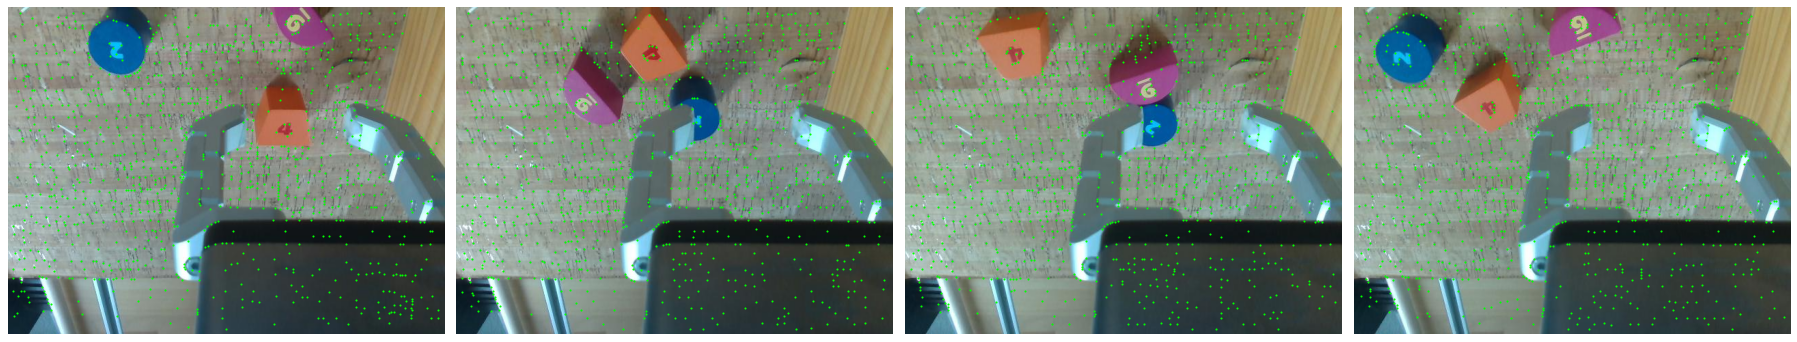

In [6]:
from hloc.utils.io import get_keypoints

num_images = 4
plot_images([read_image(hloc_root / r) for r in references[:num_images]], dpi=75)
plot_keypoints([get_keypoints(features_path, r) for r in references[:num_images]], colors='lime', ps=4)

## Load Match Database

hloc saves all features and matches in a SQL database, so reading these is the easiest option.

/home/argusm/Desktop/Demonstrations/2023-01-24 14-36-55
/home/argusm/Desktop/Demonstrations/2023-01-24/14-36-55/frame_000018.npz


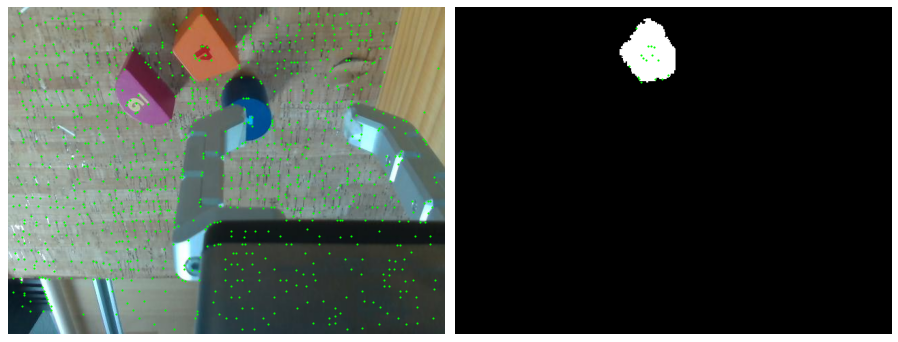

In [7]:
from hloc.utils.io import get_keypoints
from flow_control.localize.hloc_utils import get_segmentation

name0 = references[1]
kps0, noise0 = get_keypoints(features_path, name0, return_uncertainty=True)
kps0_seg, noise0 = get_keypoints(features_seg_path, name0, return_uncertainty=True)
seg = get_segmentation(root_dir, name0)

plot_images([read_image(hloc_root / r) for r in [name0, ]]+[seg], dpi=75)
plot_keypoints([kps0, kps0_seg], colors='lime', ps=4)

In [8]:
from hloc.utils.io import get_matches
from flow_control.localize.hloc_utils import kp_seg_filter

name_q = references[1]
name_d = references[3]

matches, scores = get_matches(matches_path, name_q, name_d)
kps_q, noise_q = get_keypoints(features_path, name_q, return_uncertainty=True)
kps_d, noise_d = get_keypoints(features_path, name_d, return_uncertainty=True)
kps_q_match = kps_q[matches[:, 0]]
kps_d_match = kps_d[matches[:, 1]]

#%prun in_seg = kp_seg_filter_pb(kps_d_match, name_d)
in_seg = kp_seg_filter(kps_d_match, name_d, features_seg_path)

print("in_seg", in_seg)
print(kps_d_match[in_seg].shape)

kps_q_seg = kps_q_match[in_seg]
kps_d_seg = kps_d_match[in_seg]

in_seg [192]
(1, 2)


/home/argusm/Desktop/Demonstrations/2023-01-24 15-00-24
/home/argusm/Desktop/Demonstrations/2023-01-24/15-00-24/frame_000018.npz


  0%|          | 0/30 [00:00<?, ?it/s]

/home/argusm/Desktop/Demonstrations/2023-01-24 14-18-38
/home/argusm/Desktop/Demonstrations/2023-01-24/14-18-38/frame_000018.npz
5


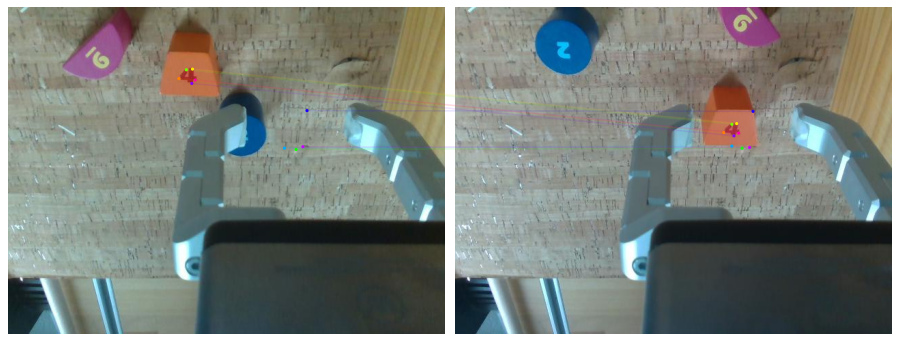

/home/argusm/Desktop/Demonstrations/2023-01-24 14-44-07
/home/argusm/Desktop/Demonstrations/2023-01-24/14-44-07/frame_000018.npz


WARNING - 2023-04-04 13:49:51,353 - fitting - solve_transform failed: empty set.


2


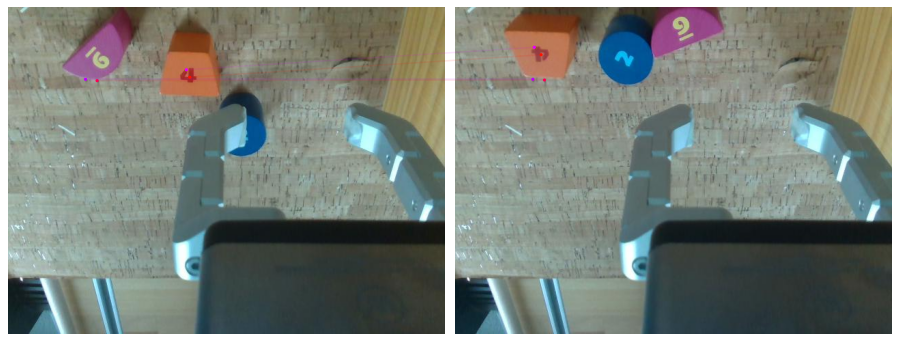

/home/argusm/Desktop/Demonstrations/2023-01-24 14-49-29
/home/argusm/Desktop/Demonstrations/2023-01-24/14-49-29/frame_000018.npz


WARNING - 2023-04-04 13:49:51,869 - fitting - solve_transform failed: empty set.
/home/argusm/miniconda3/envs/ur_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/argusm/miniconda3/envs/ur_env/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0


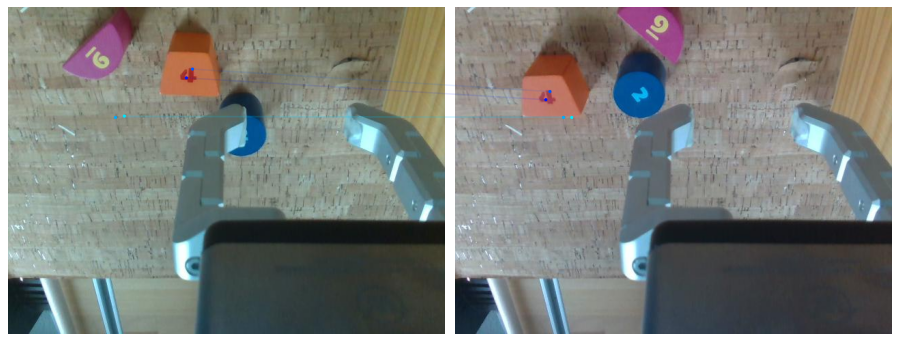

/home/argusm/Desktop/Demonstrations/2023-01-24 14-58-14
/home/argusm/Desktop/Demonstrations/2023-01-24/14-58-14/frame_000018.npz
4


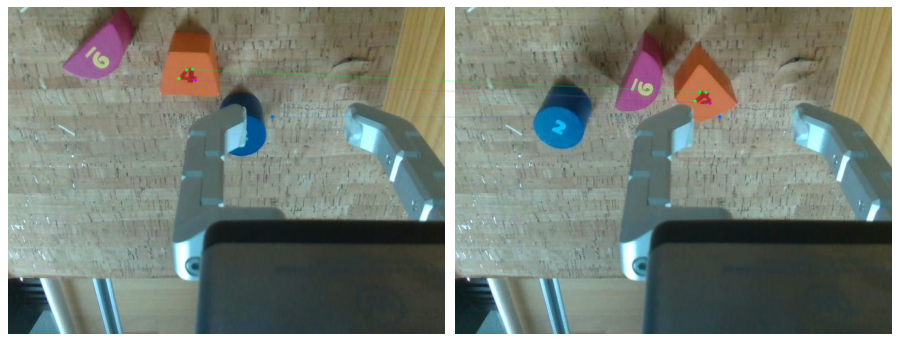

/home/argusm/Desktop/Demonstrations/2023-01-24 15-28-48
/home/argusm/Desktop/Demonstrations/2023-01-24/15-28-48/frame_000018.npz
/home/argusm/Desktop/Demonstrations/2023-01-24 15-40-31
/home/argusm/Desktop/Demonstrations/2023-01-24/15-40-31/frame_000018.npz
7


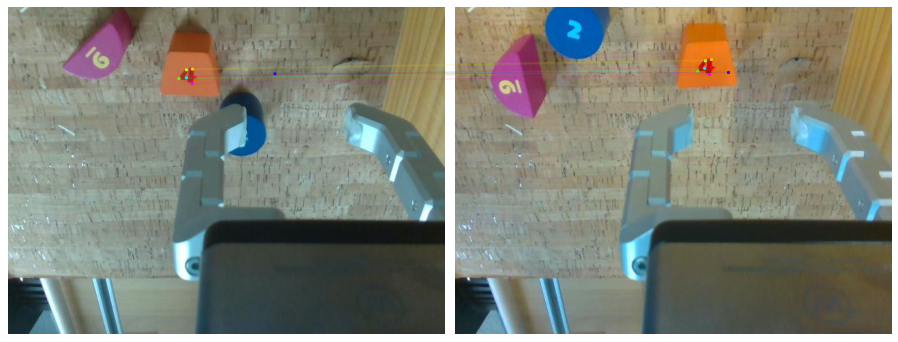

/home/argusm/Desktop/Demonstrations/2023-01-24 17-52-21
/home/argusm/Desktop/Demonstrations/2023-01-24/17-52-21/frame_000018.npz
3


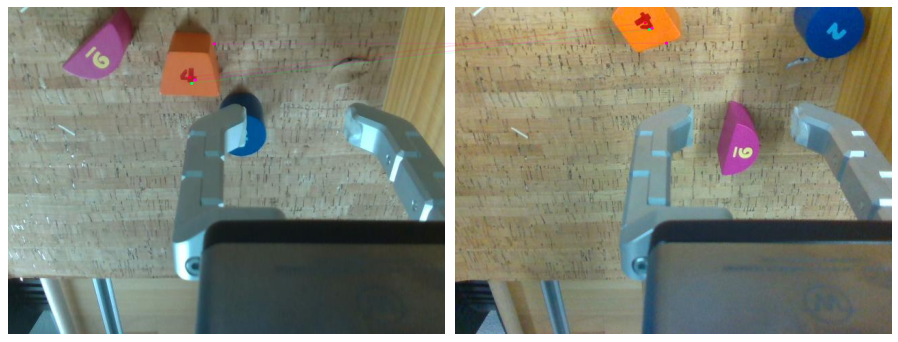

/home/argusm/Desktop/Demonstrations/2023-01-24 17-56-13
/home/argusm/Desktop/Demonstrations/2023-01-24/17-56-13/frame_000018.npz
2


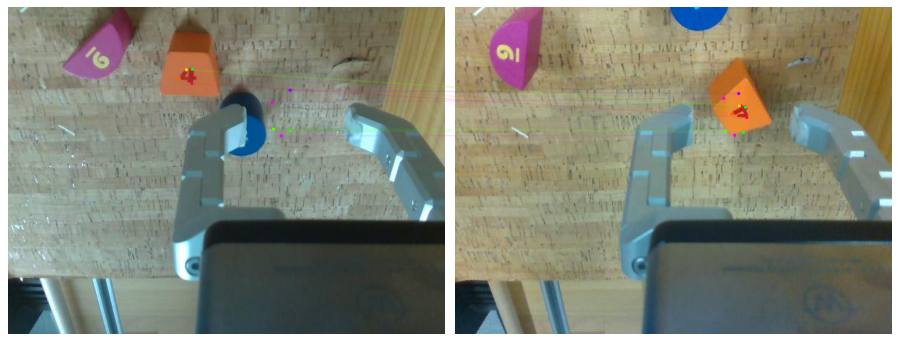

/home/argusm/Desktop/Demonstrations/2023-01-24 18-00-22
/home/argusm/Desktop/Demonstrations/2023-01-24/18-00-22/frame_000018.npz
4


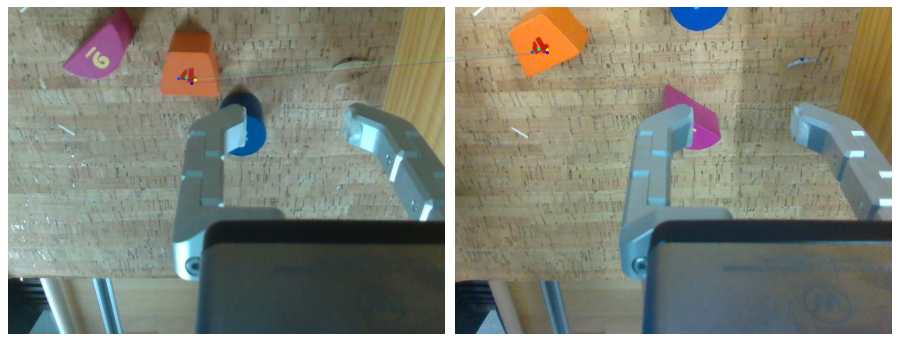

mapping/15-00-24_18.jpeg mapping/15-40-31_18.jpeg


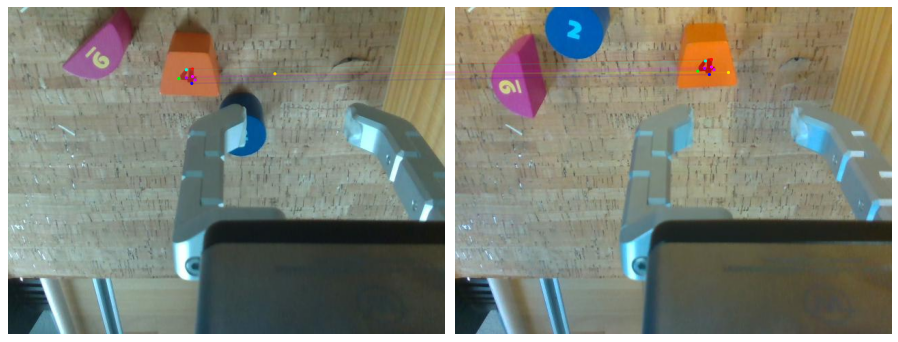

In [9]:
from hloc.visualization import plot_matches
from flow_control.localize.hloc_utils import get_playback, align_pointclouds
import matplotlib.pyplot as plt
import os
import json

idx = 10
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
    
os.makedirs("./mapping", exist_ok=True)
def find_best_demo(name_q, query_cam, references):
    
    results = {}
    for name_d in tqdm(references):
        if name_q == name_d:
            continue
        
        res = align_pointclouds(root_dir, matches_path, features_path, features_seg_path,
                                           name_q, name_d, query_cam=query_cam)
        if res is None:
            continue
            
        res['trf_est'] = res['trf_est']
        res['num_inliers'] = int(res['num_inliers'])
        res['num_candidates'] = int(res['num_candidates'])
        res['in_score'] = float(res['num_candidates'])
        
        results[name_d] = res
        print(res['num_inliers'])
        plot_images([read_image(hloc_root / r) for r in [name_q, name_d]], dpi=75)
        plot_matches(res["kps_q"], res["kps_d"], a=0.1)
#         print(res['kps_q'], res["kps_d"])
        plt.show()

    results = {k: v for k, v in results.items() if v is not None}
    results_sorted = sorted(results.items(), key=lambda t: -t[1]["num_inliers"])
#     print(results)
#     with open(f'{references[idx]}.json', 'w') as f:
#         json.dump(results, f)
#           json.dumps(results, f, cls=NpEncoder)
        
    name_d_best = results_sorted[0][0]
    res_best = results_sorted[0][1]
    return name_d_best, res_best, results

# for idx in range(11, len(references)):    
idx = 10
name_q = references[idx]
pb, frame_index = get_playback(root_dir, name_q)
query_cam = pb[frame_index].cam

#%prun -D program.prof 
name_d_best, res_best, results = find_best_demo(name_q, query_cam, references)
print(name_q, name_d_best)
trf_best = res_best["trf_est"]

plot_images([read_image(hloc_root / r) for r in [name_q, name_d_best]], dpi=75)
plot_matches(res_best["kps_q"], res_best["kps_d"], a=0.1)

In [10]:
import numpy as np
import copy
import open3d as o3d
from flow_control.localize.hloc_utils import get_pointcloud, get_segmented_pointcloud

def draw_registration_result(source_arr, target_arr, transformation, color="rgb"):
    source = o3d.geometry.PointCloud()
    source.points = o3d.utility.Vector3dVector(source_arr[:, :3])
    target = o3d.geometry.PointCloud()
    target.points = o3d.utility.Vector3dVector(target_arr[:, :3])
    
    if color == "rgb":
        source.colors = o3d.utility.Vector3dVector(source_arr[:, 4:7] )
        target.colors = o3d.utility.Vector3dVector(target_arr[:, 4:7] )
        source_temp = copy.deepcopy(source)
        target_temp = copy.deepcopy(target)
    else:
        source_temp = copy.deepcopy(source)
        target_temp = copy.deepcopy(target)
        source_temp.paint_uniform_color([1, 0.706, 0])
        target_temp.paint_uniform_color([0, 0.651, 0.929])
        
    source_temp.transform(transformation)
    o3d.visualization.draw_geometries([source_temp, target_temp])

    
# pc_full_q, bbox = get_segmented_pointcloud(name_q, root_dir=root_dir)
pc_full_d, bbox = get_segmented_pointcloud(name_d_best, root_dir=root_dir)
pc_full_q, bbox = get_segmented_pointcloud(name_q, root_dir=root_dir, is_live=True, trf=np.linalg.inv(trf_best), bbox=bbox)
# pc_full_q, bbox = get_segmented_pointcloud(name_q, root_dir=root_dir)

# o3d.visualization.draw_geometries([pc, bbox])

print(pc_full_q.shape)
draw_registration_result(pc_full_q, pc_full_d, trf_best)

setting bbox.
<class 'numpy.ndarray'>
[ 0.03258192 -0.01853218  0.18896773  0.69019608  0.37254902  0.27843137]


RuntimeError: [1;31m[Open3D Error] (virtual open3d::geometry::OrientedBoundingBox& open3d::geometry::OrientedBoundingBox::Transform(const Matrix4d&)) /root/Open3D/cpp/open3d/geometry/BoundingVolume.cpp:74: A general transform of an OrientedBoundingBox is not implemented. Call Translate, Scale, and Rotate.
[0;m

## Demo to Live Transformation:

1. Transform Demo Pointcloud to get 'live' pointcloud 
2. Project pointcloud to get live segmentation mask
3. Create a 'live' pointcloud using live rgb and depth images, along with masked points
4. Computer ICP Metrics between demo pointcloud and the live pointcloud

In [12]:
from flow_control.rgbd_camera import RGBDCamera
# import ipdb

def get_scores(name_q, query_cam, references, results):
    
    scores = {}
    rgbd_cam = RGBDCamera(query_cam)
    
    for name_d in results.keys():
        if name_q == name_d:
            continue
        
        pc_full_d, _ = get_segmented_pointcloud(name_d, root_dir=root_dir)
        trf_demo_to_live = np.linalg.inv(results[name_d]['trf_est'])
        
        pc_d = pc_full_d[:, 0:4]
        pc_live_transformed = trf_demo_to_live @ pc_d.T

        pts0, pts1 = query_cam.project(pc_live_transformed)
        rgb_image, depth_image = query_cam.get_image()
        masked_points = np.array([(x, y) for (x, y) in zip(pts1, pts0)])

        rgbd_cam = RGBDCamera(query_cam)
        pc_live = rgbd_cam.generate_pointcloud(rgb_image, depth_image, masked_points)
        
        print(name_d)        
        evaluation = compute_ICP_metrics(pc_live, pc_full_d, results[name_d]['trf_est'])
        
        print(evaluation)
        plot_images([read_image(hloc_root / r) for r in [name_q, name_d]], dpi=75)
        plot_matches(results[name_d]["kps_q"], results[name_d]["kps_d"], a=0.1)
        
    return scores

icp_scores = get_scores(name_q, query_cam, references, results)

setting bbox.
<class 'numpy.ndarray'>
[ 0.03171896 -0.01804134  0.18396276  0.78039216  0.45098039  0.36078431]


NotImplementedError: 

In [24]:
icp_scores

{'mapping/14-18-38_18.jpeg': None,
 'mapping/14-44-07_18.jpeg': None,
 'mapping/14-49-29_18.jpeg': None,
 'mapping/14-58-14_18.jpeg': None,
 'mapping/15-40-31_18.jpeg': None,
 'mapping/17-52-21_18.jpeg': None,
 'mapping/17-56-13_18.jpeg': None,
 'mapping/18-00-22_18.jpeg': None}

In [113]:
# Demo pointcloud
pc_full_d, _ = get_segmented_pointcloud(name_d_best, root_dir=root_dir)
trf_demo_to_live = np.linalg.inv(trf_best)

setting bbox.
<class 'numpy.ndarray'>
[ 0.03258192 -0.01853218  0.18896773  0.69019608  0.37254902  0.27843137]
[[0.2719768 0.2719768 0.2719768 ... 0.        0.        0.       ]
 [0.2719768 0.2719768 0.2719768 ... 0.        0.        0.       ]
 [0.2719768 0.2719768 0.2719768 ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]
(138758, 7)


In [114]:
from flow_control.rgbd_camera import RGBDCamera

pc_d = pc_full_d[:, 0:4]
pc_live_transformed = trf_demo_to_live @ pc_d.T

pts0, pts1 = query_cam.project(pc_live_transformed)
rgb_image, depth_image = query_cam.get_image()
masked_points = np.array([(x, y) for (x, y) in zip(pts1, pts0)])

rgbd_cam = RGBDCamera(query_cam)
pc_live = rgbd_cam.generate_pointcloud(rgb_image, depth_image, masked_points)

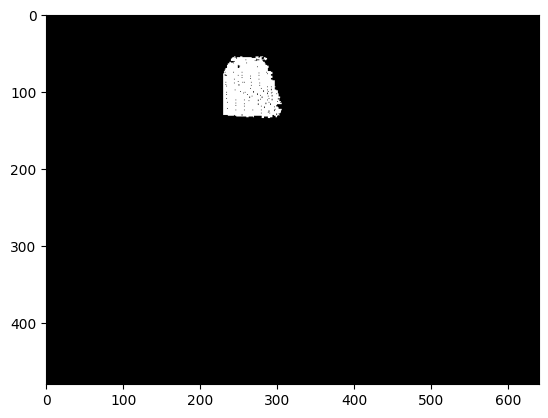

In [115]:
# Segmentation Mask
im = np.zeros_like(rgb_image)
im[pts1, pts0, :] = 255.0
plt.imshow(im)
# draw_registration_result(pc_live, pc_full_d, trf_best)

In [13]:
def compute_ICP_metrics(pc_q, pc_d, trf_q_to_d):
    pcd_q = o3d.cuda.pybind.geometry.PointCloud()
    pcd_q.points = o3d.utility.Vector3dVector(pc_q[:, 0:3])

    pcd_d = o3d.cuda.pybind.geometry.PointCloud()
    pcd_d.points = o3d.utility.Vector3dVector(pc_d[:, 0:3]) 
    
    evaluation = o3d.pipelines.registration.evaluate_registration(
        pcd_q, pcd_d, max_correspondence_distance=0.02, transformation=trf_q_to_d)
    
    print(evaluation)
    
compute_ICP_metrics(pc_live, pc_full_d, trf_best)

NameError: name 'pc_live' is not defined

# Localization (Live Inferences)

In [ ]:


from PIL import Image
def create_query_image(query_cam):
    query_dir = hloc_root / "query"
    Path(query_dir).mkdir(parents=True, exist_ok=True)
    image_path_query = query_dir / "live.jpg"
    image_arr = query_cam.get_image()[0]
    Image.fromarray(image_arr).save(image_path_query)
    return image_path_query.relative_to(hloc_root).as_posix()

name_q = references[0]
pb, frame_index = get_playback(root_dir, name_q)
query_cam = pb[frame_index].cam
query = create_query_image(query_cam)

references_live = [x for x in references if x != name_q]
extract_features.main(feature_conf, hloc_root, image_list=[query], feature_path=features_path, overwrite=True)
pairs_from_exhaustive.main(loc_pairs, image_list=[query], ref_list=references_live)
match_features.main(matcher_conf, loc_pairs, features=features_path, matches=matches_path, overwrite=True)
name_d_best_live, res_best_live = find_best_demo(query, qery_cam, references_live)

print(name_q, name_d_best_live)
plot_images([read_image(hloc_root / r) for r in [name_q, name_d_best_live]], dpi=75)
plot_matches(res_best_live["kps_q"], res_best_live["kps_d"], a=0.1)

In [ ]:
%load_ext autoreload
%autoreload 2



In [ ]:
from flow_control.localize.hloc_utils import get_playback

name_q = selection_hloc.parts_references['locate'][0]
pb, frame_index = get_playback(root_dir, name_q)
query_cam = pb[frame_index].cam
name_best, res_best = selection_hloc.get_best_demo(query_cam)
print(name_best)

# Original File

In this notebook, we will build a 3D map of a scene from a small set of images and then localize an image downloaded from the Internet. This demo was contributed by [Philipp Lindenberger](https://github.com/Phil26AT/).

In [ ]:
%load_ext autoreload
%autoreload 2
import tqdm, tqdm.notebook
tqdm.tqdm = tqdm.notebook.tqdm  # notebook-friendly progress bars
from pathlib import Path

from hloc import extract_features, match_features, reconstruction, visualization, pairs_from_exhaustive
from hloc.visualization import plot_images, read_image, plot_keypoints
from hloc.utils import viz_3d

# Setup
Here we define some output paths.

In [ ]:
images = Path('datasets/sacre_coeur')
outputs = Path('outputs/demo/')
!rm -rf $outputs
sfm_pairs = outputs / 'pairs-sfm.txt'
loc_pairs = outputs / 'pairs-loc.txt'
sfm_dir = outputs / 'sfm'
features = outputs / 'features.h5'
matches = outputs / 'matches.h5'

feature_conf = extract_features.confs['superpoint_aachen']
matcher_conf = match_features.confs['superglue']

# 3D mapping
First we list the images used for mapping. These are all day-time shots of Sacre Coeur.

In [ ]:
references = [p.relative_to(images).as_posix() for p in (images / 'mapping/').iterdir()]
print(len(references), "mapping images")
plot_images([read_image(images / r) for r in references[:4]], dpi=50)

Then we extract features and match them across image pairs. Since we deal with few images, we simply match all pairs exhaustively. For larger scenes, we would use image retrieval, as demonstrated in the other notebooks.

In [ ]:
extract_features.main(feature_conf, images, image_list=references, feature_path=features)
pairs_from_exhaustive.main(sfm_pairs, image_list=references)
match_features.main(matcher_conf, sfm_pairs, features=features, matches=matches);

The we run incremental Structure-From-Motion and display the reconstructed 3D model.

In [ ]:
model = reconstruction.main(sfm_dir, images, sfm_pairs, features, matches, image_list=references)
fig = viz_3d.init_figure()
viz_3d.plot_reconstruction(fig, model, color='rgba(255,0,0,0.5)', name="mapping")
fig.show()

We also visualize which keypoints were triangulated into the 3D model.

In [ ]:
visualization.visualize_sfm_2d(model, images, color_by='visibility', n=2)

# Localization
Now that we have a 3D map of the scene, we can localize any image. To demonstrate this, we download [a night-time image from Wikimedia](https://commons.wikimedia.org/wiki/File:Paris_-_Basilique_du_Sacr%C3%A9_Coeur,_Montmartre_-_panoramio.jpg).

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/5/53/Paris_-_Basilique_du_Sacr%C3%A9_Coeur%2C_Montmartre_-_panoramio.jpg"
# try other queries by uncommenting their url
# url = "https://upload.wikimedia.org/wikipedia/commons/5/59/Basilique_du_Sacr%C3%A9-C%C5%93ur_%285430392880%29.jpg"
# url = "https://upload.wikimedia.org/wikipedia/commons/8/8e/Sacr%C3%A9_C%C5%93ur_at_night%21_%285865355326%29.jpg"
query = 'query/night.jpg'
!mkdir -p $images/query && wget $url -O $images/$query -q
plot_images([read_image(images / query)], dpi=75)

Again, we extract features for the query and match them exhaustively.

In [ ]:
extract_features.main(feature_conf, images, image_list=[query], feature_path=features, overwrite=True)
pairs_from_exhaustive.main(loc_pairs, image_list=[query], ref_list=references)
match_features.main(matcher_conf, loc_pairs, features=features, matches=matches, overwrite=True)

We read the EXIF data of the query to infer a rough initial estimate of camera parameters like the focal length. Then we estimate the absolute camera pose using PnP+RANSAC and refine the camera parameters.

In [ ]:
import pycolmap
from hloc.localize_sfm import QueryLocalizer, pose_from_cluster

camera = pycolmap.infer_camera_from_image(images / query)
ref_ids = [model.find_image_with_name(r).image_id for r in references]
conf = {
    'estimation': {'ransac': {'max_error': 12}},
    'refinement': {'refine_focal_length': True, 'refine_extra_params': True},
}
localizer = QueryLocalizer(model, conf)
ret, log = pose_from_cluster(localizer, query, camera, ref_ids, features, matches)

print(f'found {ret["num_inliers"]}/{len(ret["inliers"])} inlier correspondences.')
visualization.visualize_loc_from_log(images, query, log, model)

We visualize the correspondences between the query images a few mapping images. We can also visualize the estimated camera pose in the 3D map.

In [ ]:
pose = pycolmap.Image(tvec=ret['tvec'], qvec=ret['qvec'])
viz_3d.plot_camera_colmap(fig, pose, camera, color='rgba(0,255,0,0.5)', name=query)
fig.show()